<a href="https://colab.research.google.com/github/acucenarodrigues1998/TutorialPyBR2023-GenAINotebooks/blob/main/Tutorial_PyBR_01_Remo%C3%A7%C3%A3o_de_Ru%C3%ADdos_com_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. Remoção de Ruídos com Autoencoder - Tutorial PyBR

# **As redes autoencoder**

Autoencoders são uma classe especializada de redes neurais artificiais amplamente empregada em tarefas de aprendizado não supervisionado. Eles desempenham um papel fundamental na extração de características e na representação eficiente de dados, permitindo a codificação de informações complexas em uma forma comprimida e, em seguida, a reconstrução desses dados.

## **Como são contituídas as redes autoencoder**

Eles são compostos por duas partes principais: um **codificador (encoder)** e um **decodificador (decoder)**. A função principal de um autoencoder é aprender a representação comprimida (ou codificação) de dados de entrada, que é uma versão mais compacta e informativa dos dados originais. Em seguida, o decodificador reconstrói os dados de entrada a partir dessa representação comprimida.

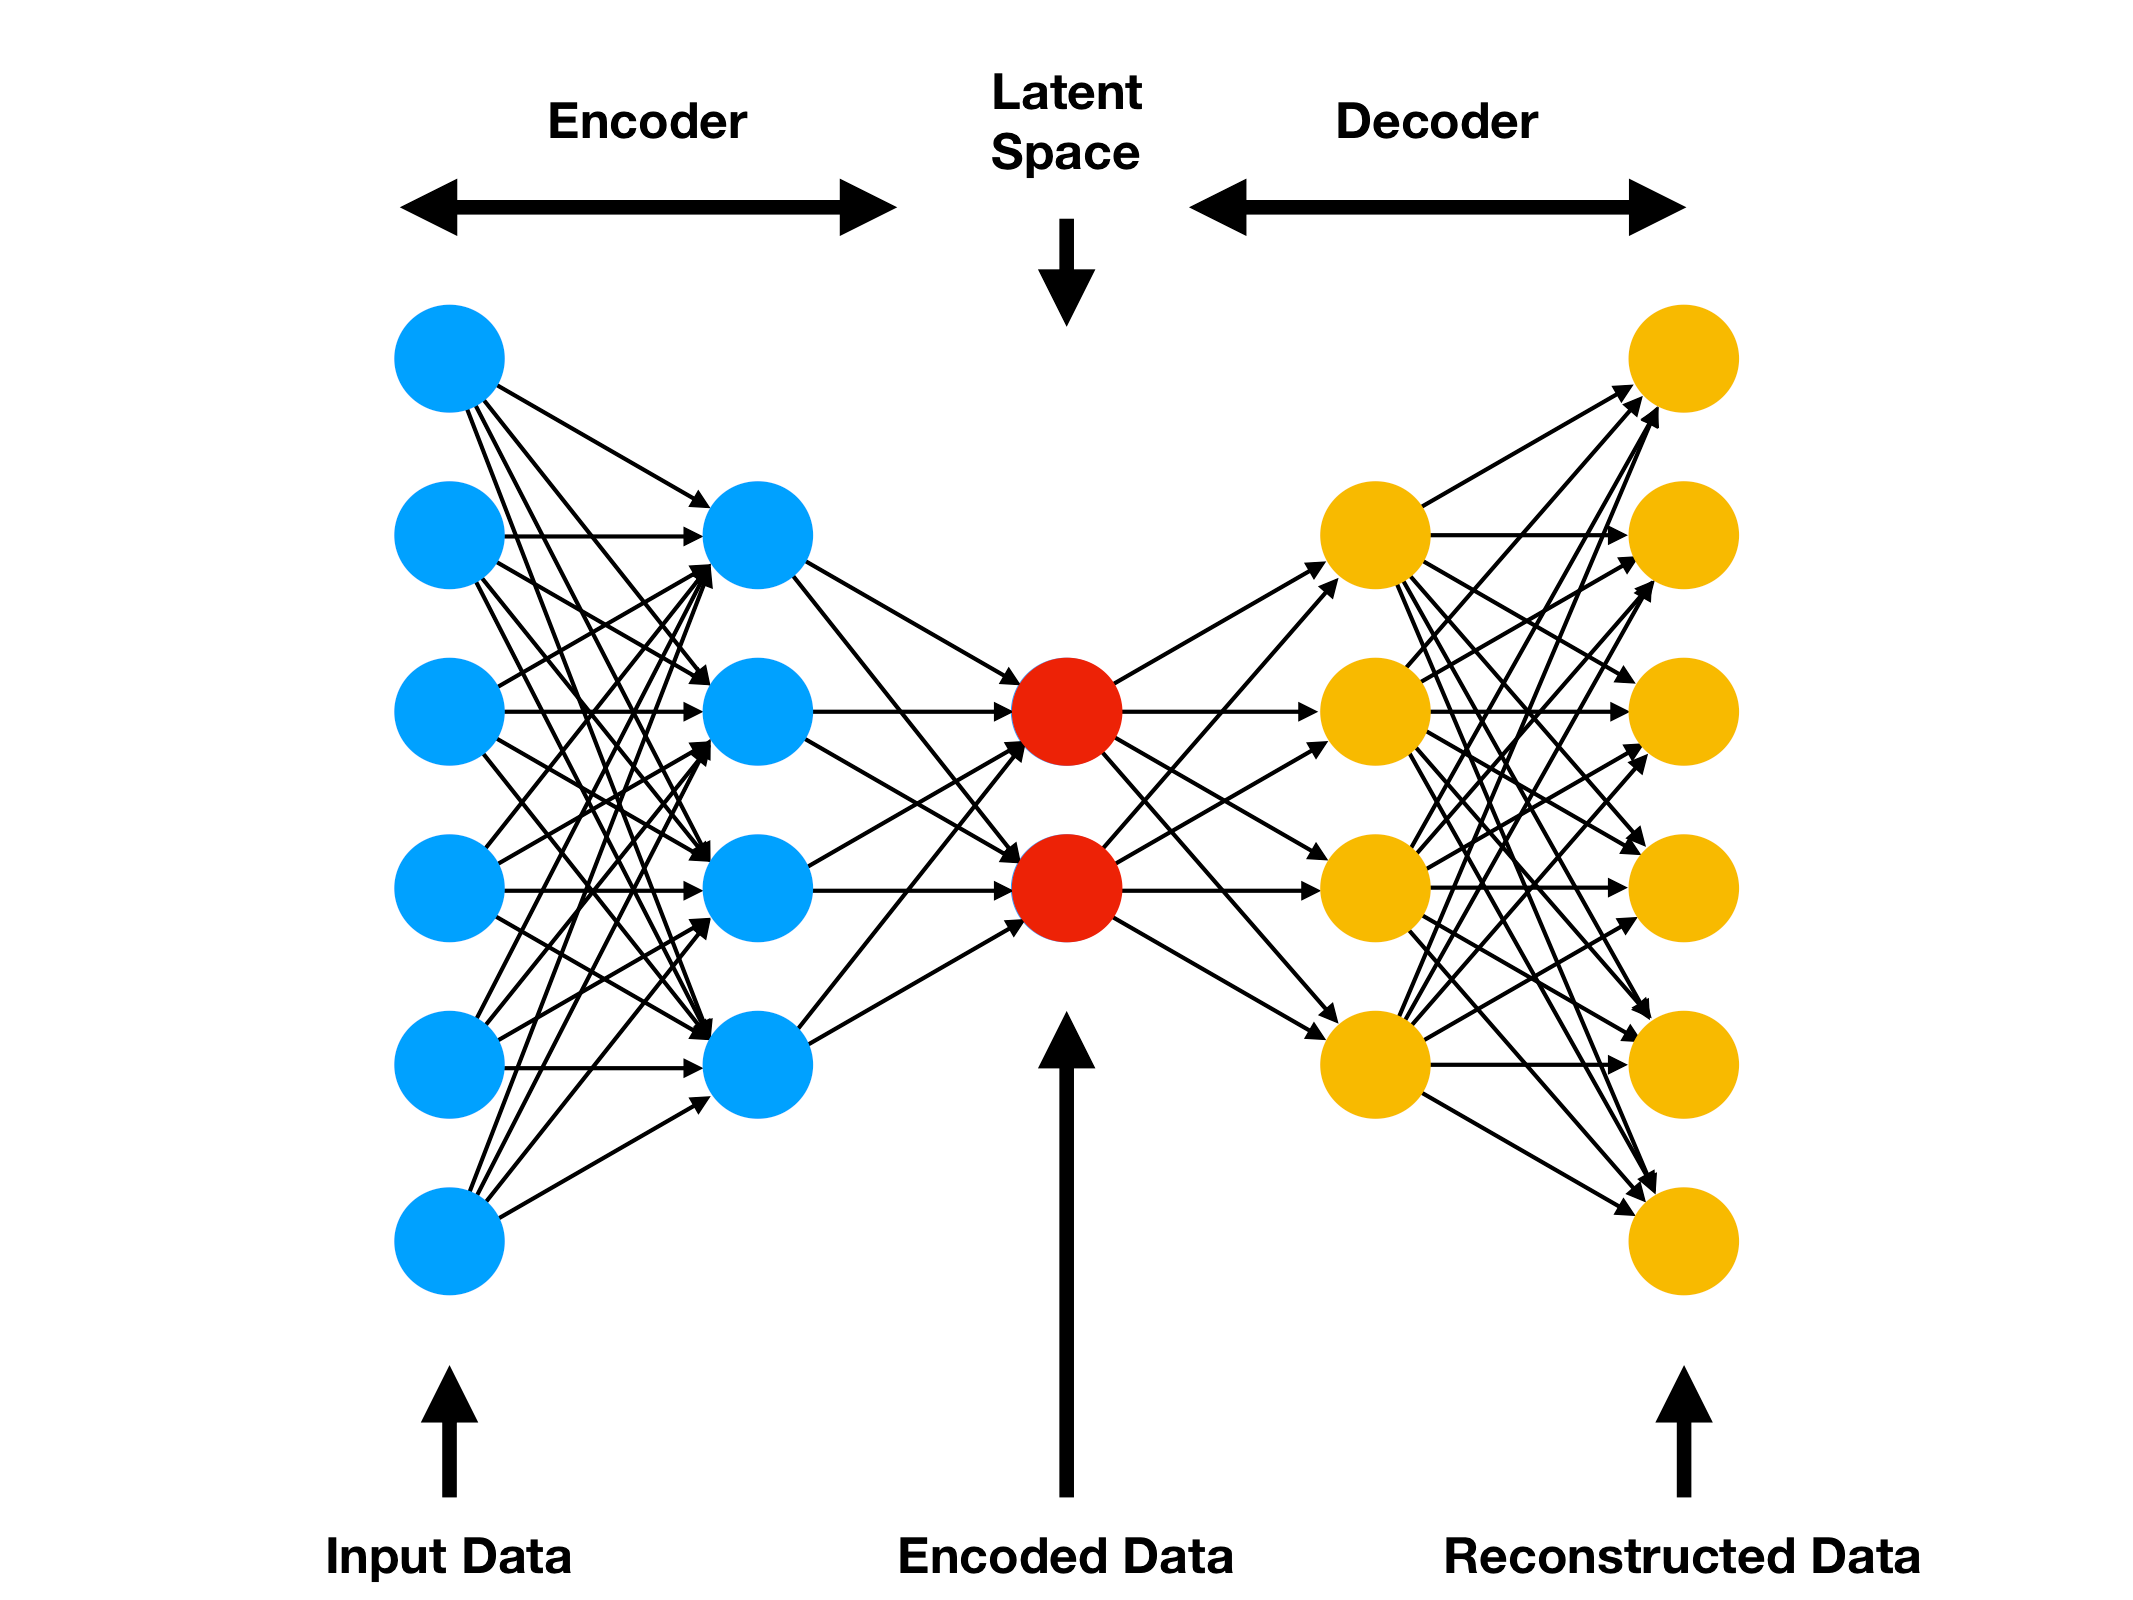

O objetivo dos autoencoders é minimizar a perda de informação durante o processo de codificação e decodificação, de modo que a reconstrução seja o mais fiel possível aos dados de entrada. Isso permite que eles sejam usados em tarefas como redução de dimensionalidade, denoising (remoção de ruído) de dados, geração de dados semelhantes aos dados de treinamento, entre outras aplicações.

Autoencoders são úteis em diversas áreas, incluindo visão computacional, processamento de linguagem natural e recomendação de conteúdo, onde a extração de características e a representação eficiente de dados desempenham um papel fundamental.

## **Tipos de autoencoders**

Existem diversos tipos de autoencoders, cada um projetado para atender a diferentes necessidades e tarefas. Alguns dos tipos mais comuns de autoencoders incluem:

1. **Autoencoder Padrão (Vanilla Autoencoder)**: Este é o tipo mais básico de autoencoder, composto por uma camada de entrada, uma camada de codificação e uma camada de decodificação. Ele é usado para tarefas de redução de dimensionalidade e extração de características.

2. **Autoencoder Denoising (Denoising Autoencoder)**: Esses autoencoders são treinados para reconstruir dados que foram corrompidos com ruído. Isso ajuda a aprender representações robustas e elimina informações indesejadas.

3. **Sparse Autoencoder**: Nesse tipo, as representações de codificação são esparsas, o que significa que a maioria dos neurônios na camada de codificação permanece inativa. Isso ajuda a destacar as características mais importantes dos dados.

4. **Contractive Autoencoder**: Eles são treinados para minimizar a sensibilidade dos dados de entrada a pequenas perturbações, tornando-os úteis para tarefas de aprendizado robusto.

5. **Variational Autoencoder (VAE)**: VAEs introduzem conceitos da teoria probabilística. Eles geram representações contínuas e são amplamente usados para geração de dados. VAEs são úteis em tarefas como geração de imagens e interpolação entre dados.

6. **Conditional Variational Autoencoder (CVAE)**: Essa variação do VAE permite a geração condicional de dados, ou seja, geração de dados com base em condições específicas.

7. **Variational Autoencoder with Wasserstein distance (WAE)**: Uma variação do VAE que utiliza a distância de Wasserstein em vez da divergência KL para medir a diferença entre as distribuições latentes e as distribuições de prioridade.

8. **Sequence-to-Sequence Autoencoder**: Projetados para sequências de dados, como texto ou séries temporais. Eles codificam uma sequência de entrada em uma representação latente e decodificam para reconstruir a sequência de saída.

9. **Stacked Autoencoder**: Consistem em empilhar vários autoencoders em camadas, criando uma rede profunda. Isso é comumente usado em tarefas de extração de características profundas.

10. **Convolutional Autoencoder (CAE)**: Adaptados para dados com estrutura espacial, como imagens. Eles usam camadas convolucionais em vez de totalmente conectadas para a codificação e decodificação.

11. **Recurrent Autoencoder**: Projetados para dados sequenciais, como séries temporais. Eles usam camadas recorrentes para lidar com a natureza temporal dos dados.

Esses são alguns dos tipos de autoencoders mais comuns, cada um adequado para tarefas específicas, variando de redução de dimensionalidade e denoising a geração de dados e extração de características em domínios particulares.

## A aplicação prática

A partir de agora, faremos uma pequena aplicação prática utilizando autoencoder. Nossa tarefa é remover o ruído de imagens da base MNIST. Para alcançar isso, iniciaremos com a preparação da base, carregando as imagens e adicionando ruído propositalmente. Em seguida, definiremos o modelo do autoencoder, procederemos ao treinamento e, por fim, avaliaremos quão bem o autoencoder é capaz de restaurar as imagens à sua forma original, livres de ruído.

![](https://iq.opengenus.org/content/images/2019/07/a1.png)

## **Importação das bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import models
from tensorflow.keras.layers import Dense ,Conv2D ,Conv2DTranspose , MaxPooling2D ,UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## **Carregando o dataset e visualizando algumas amostras**

O dataset MNIST é um conjunto de dados amplamente utilizado em aprendizado de máquina e visão computacional. Ele consiste em 70.000 imagens em preto e branco de dígitos escritos à mão (0 a 9), cada um em um formato de 28x28 pixels. O MNIST é comumente empregado para tarefas de classificação e é um benchmark padrão para algoritmos de reconhecimento de dígitos.

Para essa aplicação, o dataset é obtido diretamente pela biblioteca Tensorflow.

In [2]:
# Carregando a base mnist direto do tensorflow
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step



Classe: 4



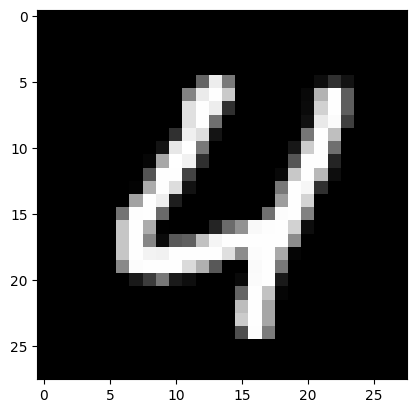

In [3]:
# Visualização de uma imagem da base
i = random.randint(1,60000) # Selecinando um index aleatório para a imagem que será mostrada

plt.imshow(X_train[i] , cmap = 'gray') # plot da imagem
label = y_train[i]
print(f"\nClasse: {label}\n")

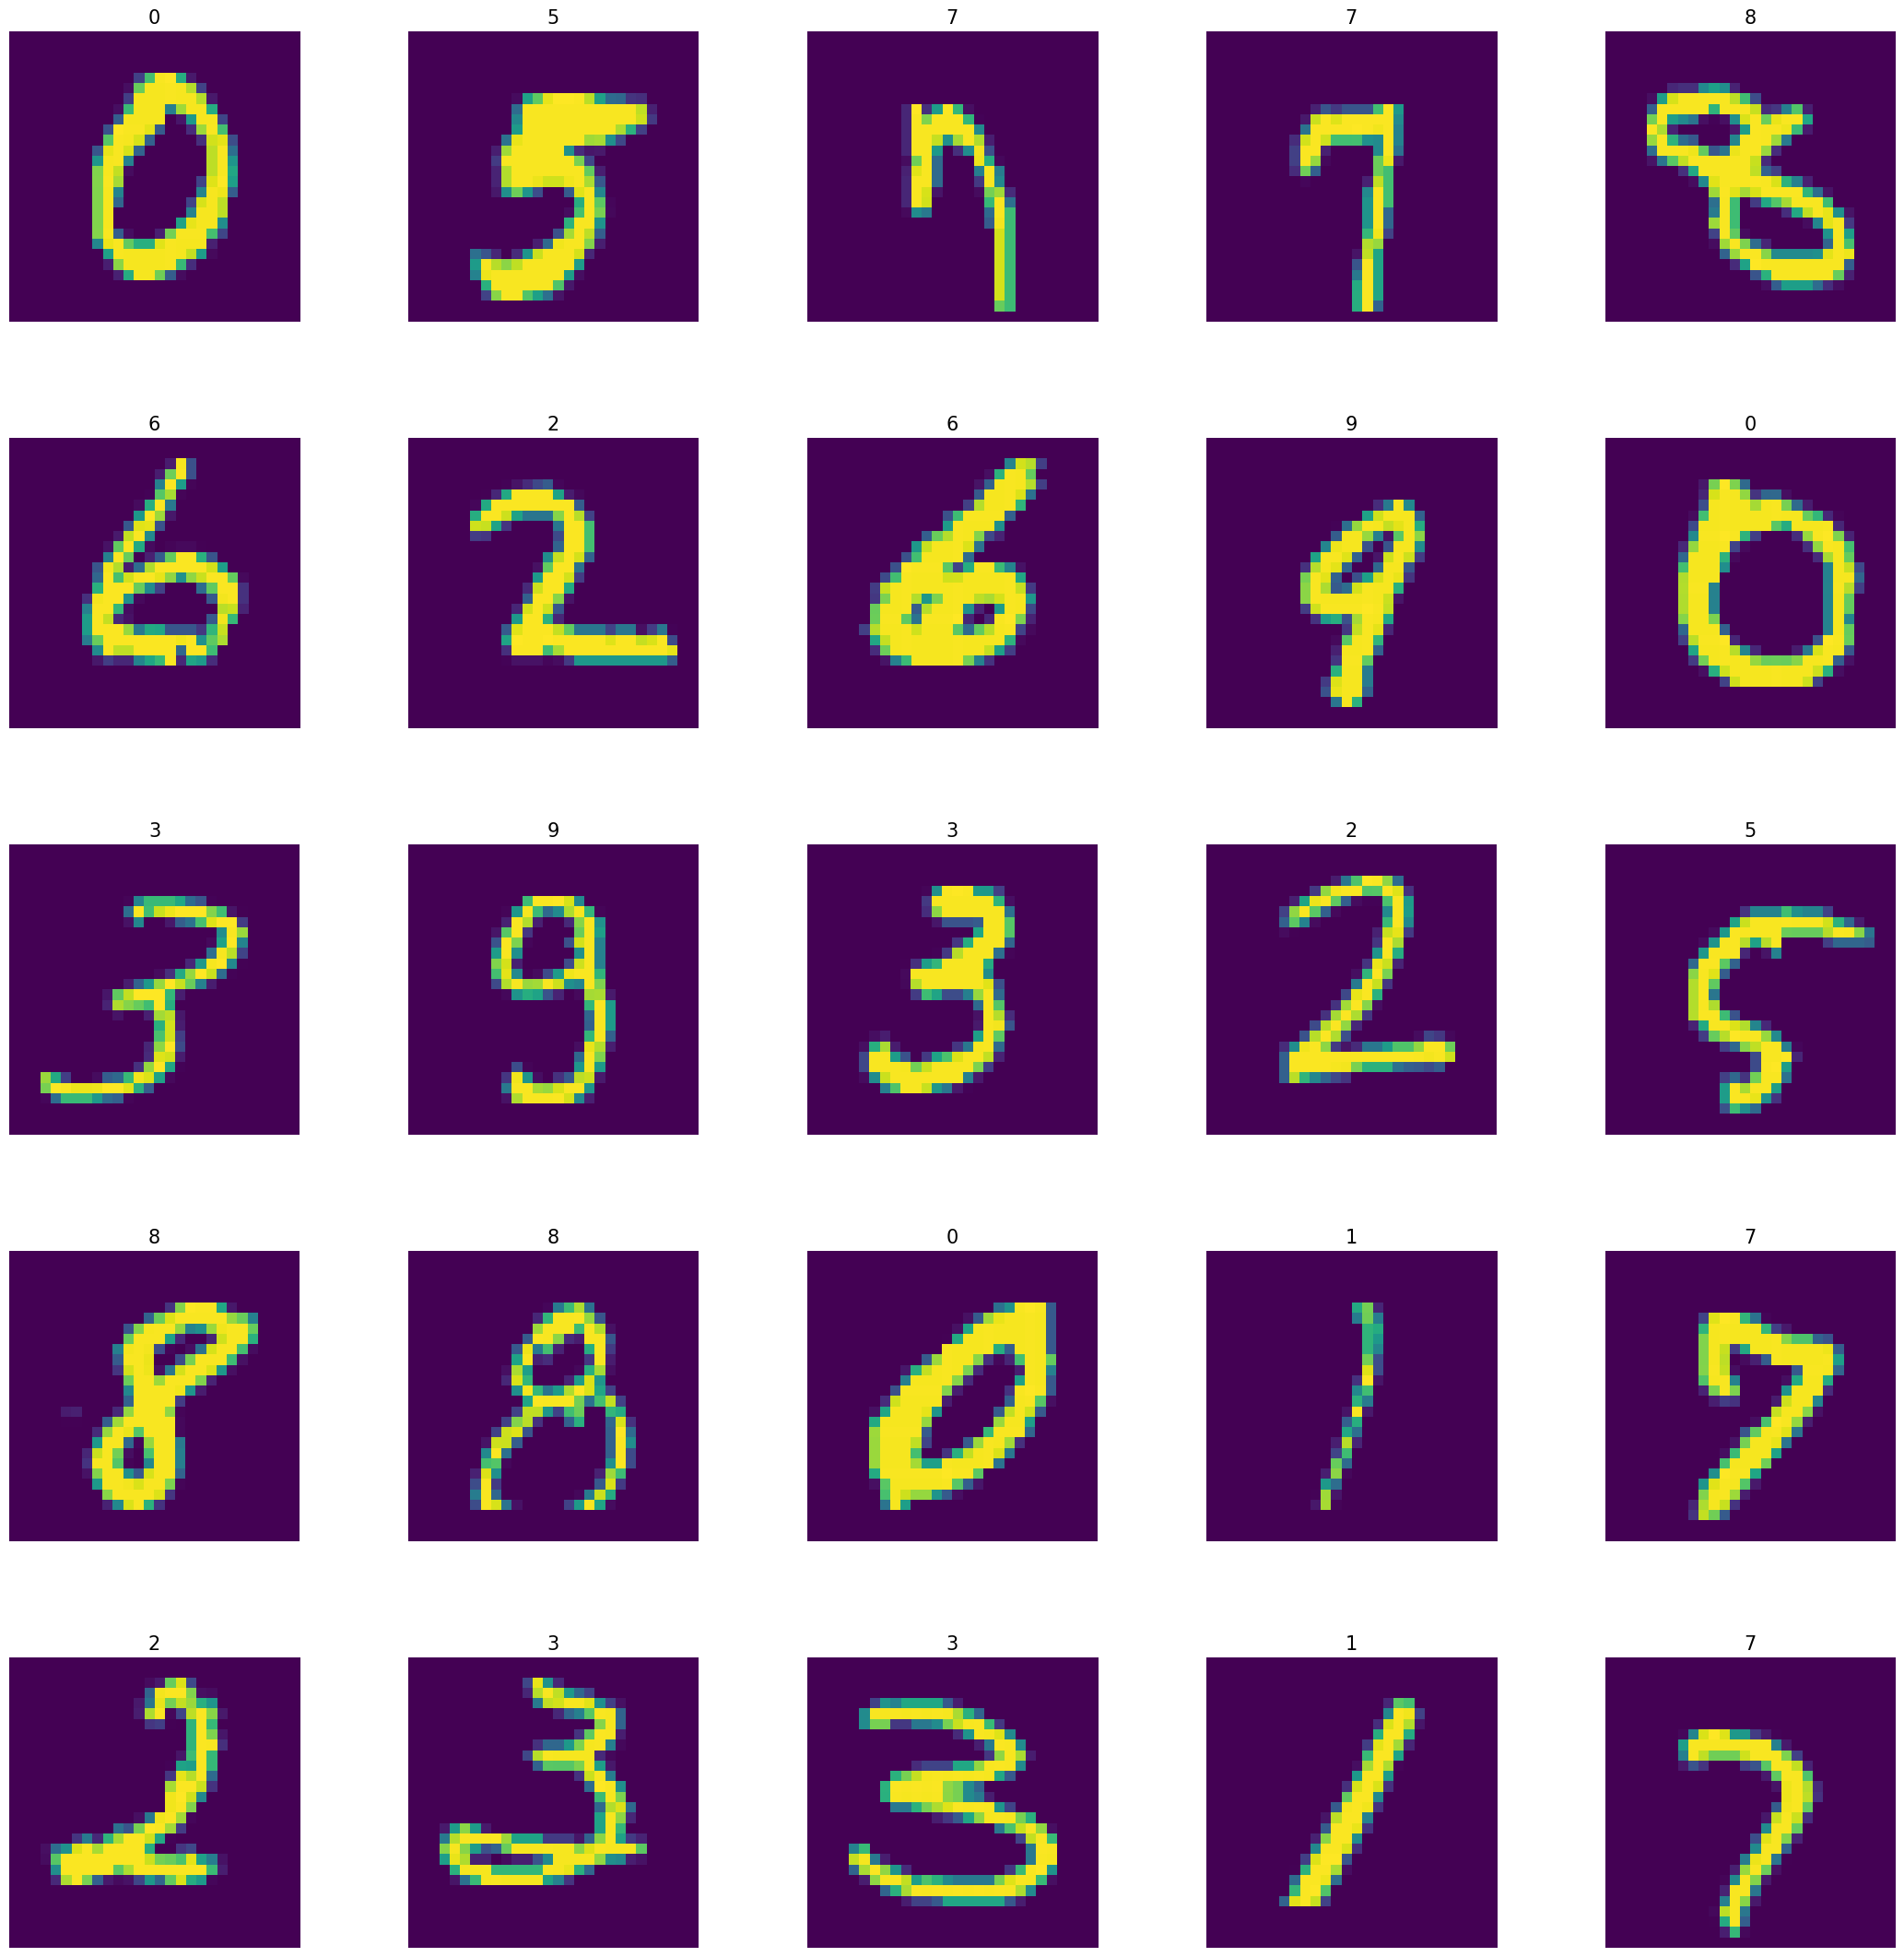

In [4]:
# Visualização de mais algumas imagens em grid
W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (27,27))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index
    axes[i].imshow( X_train[index] )
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

## Preparando o dataset

A preparação do dataset aqui consiste na normalização dos dados, dividindo a matriz de imagens por 255 e a aplicação, intencional, do ruído que será posteriormente removido pelo autoencoder.

In [5]:
# Let's normalize the data
X_train = X_train / 255
X_test = X_test / 255

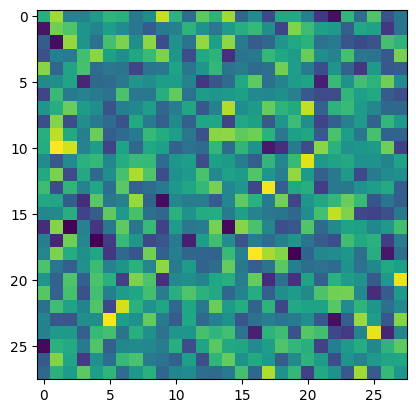

In [6]:
# Let's create some noise with the same dimensions as the original image (28,28)
added_noise = np.random.randn(*(28,28))
noise_factor = 0.3
added_noise = noise_factor * np.random.randn(*(28,28))
plt.imshow(added_noise)

In [7]:
X_train_noisy = []
noise_factor = 0.2

for sample_image in X_train:
  sample_image_noisy = sample_image + noise_factor * np.random.randn(*(28,28))
  sample_image_noisy = np.clip(sample_image_noisy, 0., 1.)
  X_train_noisy.append(sample_image_noisy)
X_train_noisy = np.array(X_train_noisy)

In [8]:
X_test_noisy = []
noise_factor = 0.4

for sample_image in X_test:
  sample_image_noisy = sample_image + noise_factor * np.random.randn(*(28,28))
  sample_image_noisy = np.clip(sample_image_noisy, 0., 1.)
  X_test_noisy.append(sample_image_noisy)
X_test_noisy = np.array(X_test_noisy)

In [9]:
X_train_noisy = X_train_noisy.reshape(-1, 28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)

## Construindo o autoencoder

In [10]:
autoencoder = models.Sequential()

#Encoding
autoencoder.add(Conv2D(25,(3,3),strides=1,padding='same',input_shape=(28, 28, 1)))
autoencoder.add(MaxPooling2D((2,2),padding='same'))
autoencoder.add(Conv2D(12,(3,3),strides=1,padding='same'))
autoencoder.add(MaxPooling2D((2,2),padding='same'))

# Encoded image (code layer)
autoencoder.add(Conv2D(15,(3,3),strides=1,padding='same'))

# Decoding
autoencoder.add(UpSampling2D((2,2)))
autoencoder.add(Conv2DTranspose(25,(3,3),strides=1,padding='same'))
autoencoder.add(UpSampling2D((2,2)))
autoencoder.add(Conv2DTranspose(1,(3,3),strides=1,padding='same',activation='sigmoid'))

In [11]:
autoencoder.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001))

In [12]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 25)        250       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 25)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 12)        2712      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 12)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 15)          1635      
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 15)        0

## Treinando o modelo

In [13]:
autoencoder.fit(X_train_noisy,
                X_train,
                epochs=10,
                batch_size=200)

Epoch 1/10
300/300 [==============================] - 14s 6ms/step - loss: 0.1625
Epoch 2/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0967
Epoch 3/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0918
Epoch 4/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0893
Epoch 5/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0876
Epoch 6/10
300/300 [==============================] - 2s 6ms/step - loss: 0.0863
Epoch 7/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0852
Epoch 8/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0842
Epoch 9/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0835
Epoch 10/10
300/300 [==============================] - 2s 5ms/step - loss: 0.0828


## Avaliando os resultados

1/1 [==============================] - 0s 233ms/step


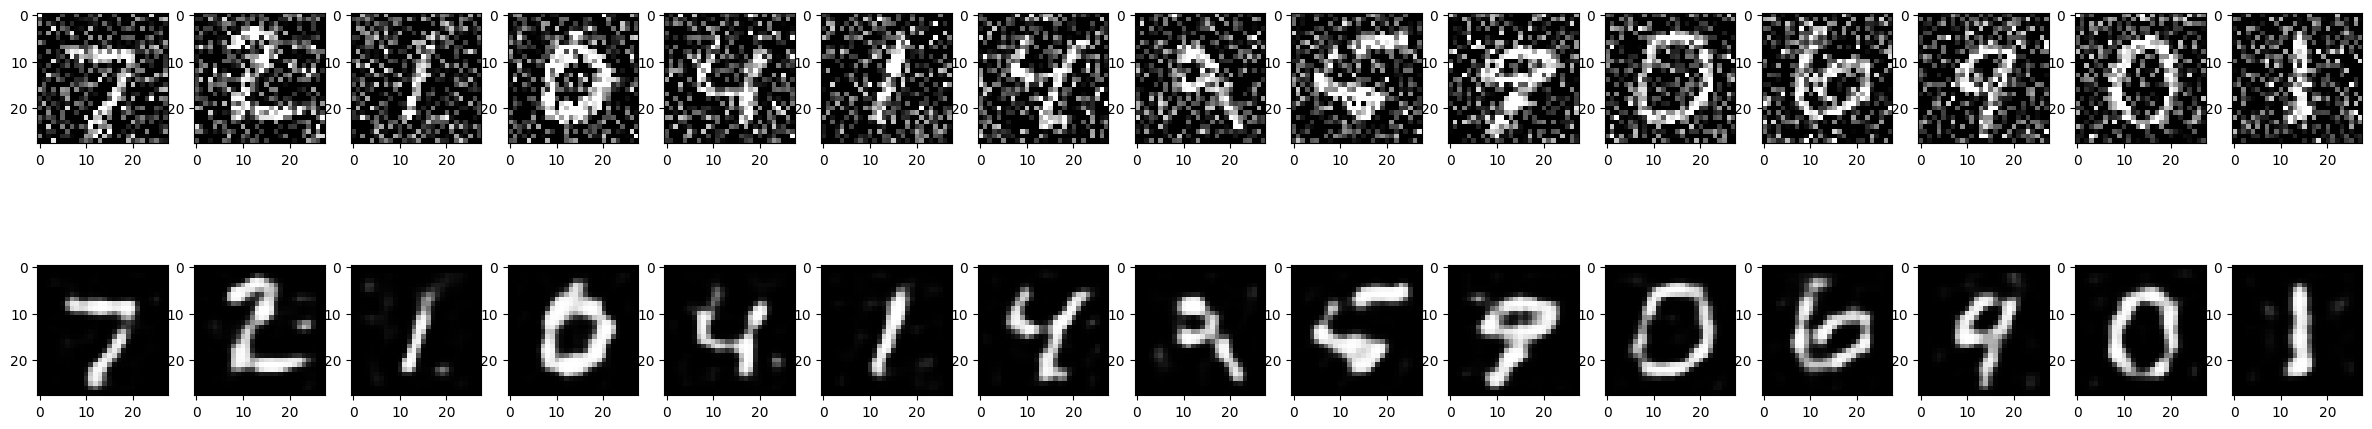

In [14]:
denoised_images = autoencoder.predict(X_test_noisy[:15].reshape(-1, 28, 28, 1))

fig, axes = plt.subplots(nrows=2, ncols=15, figsize=(30,6))
for images, row in zip([X_test_noisy[:15], denoised_images], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='gray')

## **Explore outras possibilidades**

Após esse tutorial, experimente algumas novas aplicações, por exemplo:

* Rode esse código para alguma outra base de imagens e analise os resultados.
* Altere arquitetura da rede e parâmetros do treinamento e analise se há alguma alteração nos resultados.
* Busque outros tipos de arquiteturas de autoencoder e aplique em alguma base de imagens (eu recomendo uma CVAE)

Depois, se quiser, posta o resultado lá no Linkedin e marca a gente!! Espero que você se divirta!